# About: Notebookの利用フローまとめ

----

Notebookの利用フローを図としてまとめる例です。

# 必要なツール

このNotebookの実行には[blockdiag](http://blockdiag.com/ja/blockdiag/)が必要です。

In [5]:
!which blockdiag

/usr/local/bin/blockdiag


このNotebook環境にblockdiagコマンドがインストールされていない場合は、以下のようにしてblockdiagパッケージをインストールします。
(pipコマンドの場所は環境により異なります。)

lxmlも必要なので入れておきます。

In [15]:
!sudo pip2 install blockdiag lxml

    100% |████████████████████████████████| 5.3MB 194kB/s eta 0:00:01


fonts-japanese-gothic.ttfも入れておく

In [11]:
!sudo apt-get update && sudo apt-get upgrade -y
!sudo apt-get install -y fonts-ipaexfont-gothic

Ign http://cdn-fastly.deb.debian.org jessie InRelease
Get:1 http://cdn-fastly.deb.debian.org jessie-updates InRelease [145 kB]
Get:2 http://cdn-fastly.deb.debian.org jessie/updates InRelease [63.1 kB]
Get:3 http://cdn-fastly.deb.debian.org jessie Release.gpg [2,373 B]
Get:4 http://cdn-fastly.deb.debian.org jessie Release [148 kB]     
Get:5 http://cdn-fastly.deb.debian.org jessie-updates/main amd64 Packages [23.1 kB]
Get:6 http://cdn-fastly.deb.debian.org jessie/updates/main amd64 Packages [547 kB]
Get:7 http://cdn-fastly.deb.debian.org jessie/main amd64 Packages [9,063 kB]
Fetched 9,992 kB in 3s (2,833 kB/s)                    
Reading package lists... Done
Reading package lists... Done
Building dependency tree       
Reading state information... Done
Calculating upgrade... Done
The following packages will be upgraded:
  bind9-host dnsutils emacs24 emacs24-bin-common emacs24-common git git-man
  libbind9-90 libbluetooth3 libdns100 libgdk-pixbuf2.0-0
  libgdk-pixbuf2.0-common libgs9 li

Preparing to unpack .../linux-libc-dev_3.16.43-2+deb8u5_amd64.deb ...
Unpacking linux-libc-dev:amd64 (3.16.43-2+deb8u5) over (3.16.43-2+deb8u3) ...
Processing triggers for mime-support (3.58) ...
Processing triggers for hicolor-icon-theme (0.13-1) ...
Setting up perl-modules (5.20.2-3+deb8u9) ...
Setting up perl (5.20.2-3+deb8u9) ...
Setting up libperl5.20 (5.20.2-3+deb8u9) ...
Setting up libbluetooth3:amd64 (5.23-2+deb8u1) ...
Setting up libgdk-pixbuf2.0-common (2.31.1-2+deb8u6) ...
Setting up libgdk-pixbuf2.0-0:amd64 (2.31.1-2+deb8u6) ...
Setting up libisc95 (1:9.9.5.dfsg-9+deb8u14) ...
Setting up libdns100 (1:9.9.5.dfsg-9+deb8u14) ...
Setting up libisccc90 (1:9.9.5.dfsg-9+deb8u14) ...
Setting up libisccfg90 (1:9.9.5.dfsg-9+deb8u14) ...
Setting up libbind9-90 (1:9.9.5.dfsg-9+deb8u14) ...
Setting up liblwres90 (1:9.9.5.dfsg-9+deb8u14) ...
Setting up bind9-host (1:9.9.5.dfsg-9+deb8u14) ...
Setting up dnsutils (1:9.9.5.dfsg-9+deb8u14) ...
Setting up emacs24-common (24.4+1-5+deb8u1) ...


# ブロック図による一覧生成

以下のセルを実行(`Run All Below`)することで、Notebookがそれぞれどのような局面での利用を想定しているのか、ブロック図で確認することができます。

ブロック図は `images/notebooks-filled.svg` として保存し、他のNotebookから必要に応じて参照することとします。

一時ファイルは以下のディレクトリに作成します。

In [6]:
import tempfile
work_dir = tempfile.mkdtemp()
work_dir

'/tmp/tmpcES8FI'

## 雛形の生成

まず、Notebookの利用フローを表したブロック図の雛形を作成します。

今回は雛形作成は人手により行っています。各ブロックには、Notebook名の先頭文字列を与えるものとします。

In [31]:
%%writefile {work_dir}/notebooks.diag
blockdiag {
    node_width = 400;
    node_height = 160;
    
    evaluation-tracer -> recreators
    evaluation-tracer -> newgame1
    evaluation-tracer -> newgame2
    
    group build {
        label = "構築"
        color = "#f0f8ff";

        evaluation-tracer
    }
    group use {
        label="分析";
        color = "#f0f8ff";
        
        recreators
        newgame1
        newgame2
    }
}

Overwriting /tmp/tmpcES8FI/notebooks.diag


雛形を作成します。以下のような表示となります。

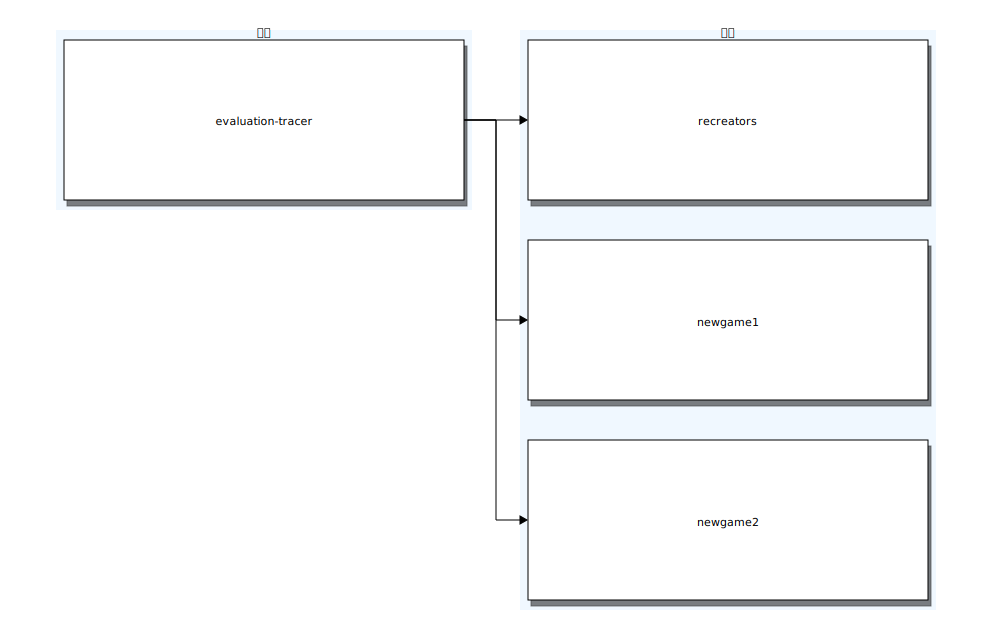

In [32]:
import os
from IPython.display import SVG

!blockdiag -f /usr/share/fonts/truetype/fonts-japanese-gothic.ttf -Tsvg \
           -o {work_dir}/notebooks.svg {work_dir}/notebooks.diag
SVG(filename=os.path.join(work_dir, 'notebooks.svg'))

## 詳細情報の埋め込み

生成した雛形に対して、見出しの情報など詳細な情報を埋め込みます。

この手順により、人手での図編集作業を最低限にとどめつつ、Notebookのわかりやすい利用フロー図を生成できるようにしています。

In [33]:
disabled = {}

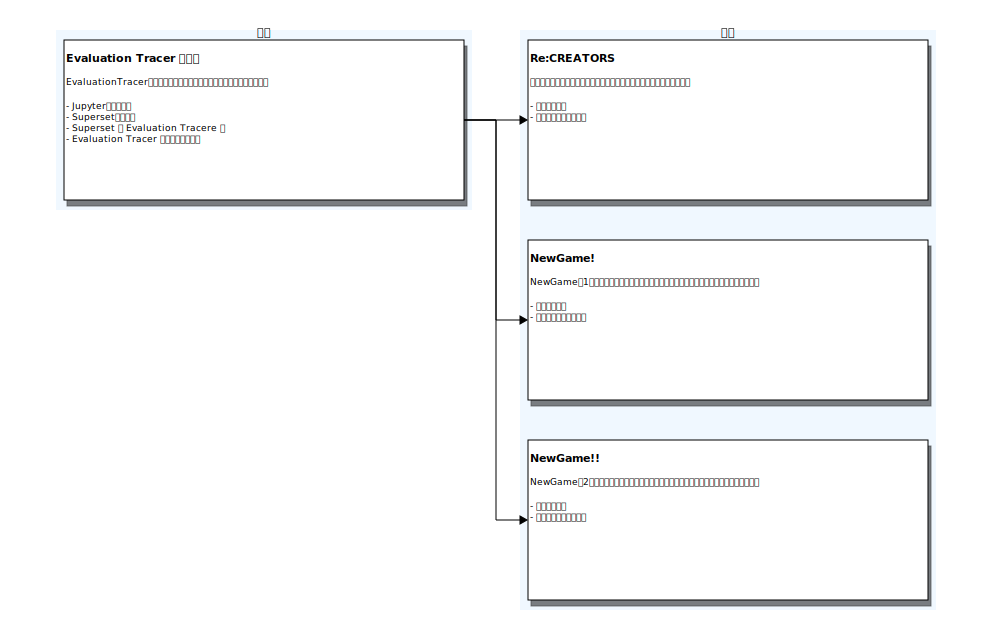

In [38]:
import re
from lxml import etree
%run generate-diagram.py

# Notebookの一覧列挙
ref_notebooks = filter(lambda m: m, map(lambda n: re.match(r'(evaluation-tracer|recreators|newgame1|newgame2)\.ipynb', n), os.listdir('.')))
ref_notebooks = sorted(ref_notebooks, key=lambda m: m.group(1))
notebook_headers = [(m.group(1), parse_headers(m.group(0))) for m in ref_notebooks]

# 雛形の読み込み
tree = etree.parse(os.path.join(work_dir, 'notebooks.svg'))
        
# 雛形をNotebook情報で置き換え
for elem in list(tree.findall('{http://www.w3.org/2000/svg}text')):
    if elem.getprevious() is not None and elem.getprevious().tag == '{http://www.w3.org/2000/svg}rect' \
       and len(elem.text) > 0:
        target_headers = [(name, h) for name, h in notebook_headers if name.startswith(elem.text)]
        rect_elem = elem.getprevious()
        if len(target_headers) > 0:
            rect = ((int(rect_elem.attrib['x']), int(rect_elem.attrib['y'])), (int(rect_elem.attrib['width']),
                                                                               int(rect_elem.attrib['height'])))
        
            childpos = elem.getparent().index(elem)
            parent_elem = elem.getparent()
            remove_texts(elem)
            insert_title(parent_elem, childpos, rect, target_headers[0][1][0][0], target_headers[0][0] + '.ipynb')            
            insert_summary(parent_elem, childpos, rect, target_headers[0][1][0][1])
            insert_headers(parent_elem, childpos, rect, target_headers[0][1][1:])
        elif elem.text in disabled:
            rect_elem.attrib['fill'] = 'rgb(192, 192, 192)'
            rect = ((int(rect_elem.attrib['x']), int(rect_elem.attrib['y'])), (int(rect_elem.attrib['width']),
                                                                               int(rect_elem.attrib['height'])))
        
            childpos = elem.getparent().index(elem)
            parent_elem = elem.getparent()
            remove_texts(elem)
            insert_title(parent_elem, childpos, rect, disabled[elem.text][0])
            insert_summary(parent_elem, childpos, rect, u'本デモ環境では利用できません')
            insert_headers(parent_elem, childpos, rect, disabled[elem.text][1])
        else:
            print(elem.text)

# SVGの保存・表示
with open('notebooks-filled.svg', 'w') as f:
    f.write(etree.tostring(tree, method='xml', pretty_print=True))

SVG(filename='notebooks-filled.svg')

# 後始末

一時ファイルを削除します。

In [8]:
!rm -fr {work_dir}